# Example of ARMA model implementation

Importing libraries

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model  import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
import pandas as pd

Genating a synthetic timeseries data 

In [5]:
def gen_series(ar, ma, length):
    ar_process = ArmaProcess(ar, ma)
    np.random.seed(400)

    X= ar_process.generate_sample(nsample=length)
    return X

In [10]:
ar_params = np.array([0.3, 0.2]) 
ma_params = np.array([0.6, 0.3]) 

ar = np.r_[1, -ar_params] # stacking 1 allows to include lag 0 in AR parameters  
ma = np.r_[1, ma_params] # Z_t is given by this term

X = gen_series(ar, ma, 100)

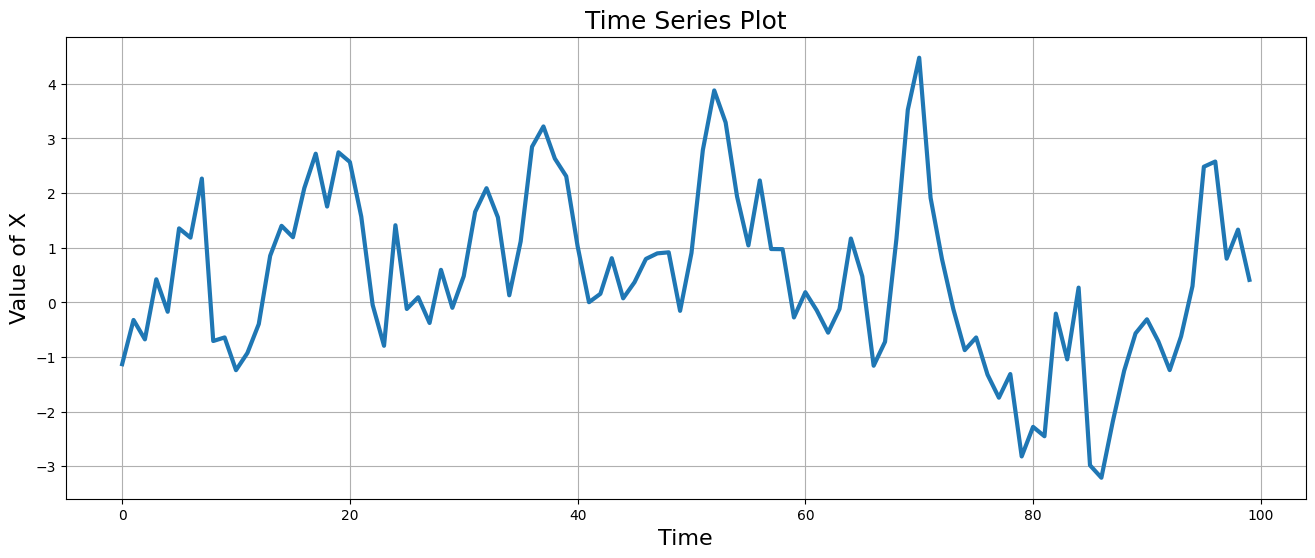

In [11]:
def plot_series(X, title='Time Series Plot', y_label='Value of X', figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    plt.plot(X, linewidth=3)
    plt.title(title, fontsize=18)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.grid()
    plt.show()

plot_series(X)

c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


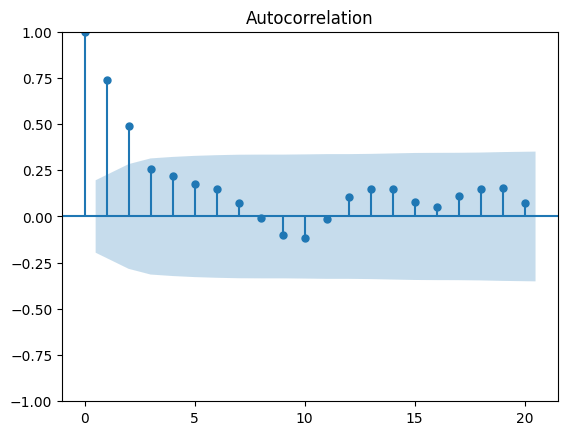

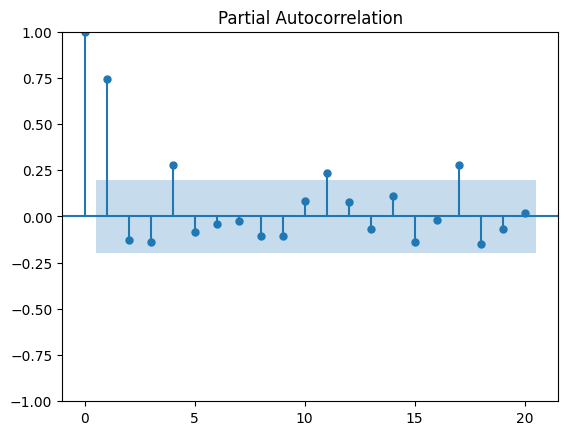

In [12]:
def plotCorr(x):
    plot_acf(x)
    plot_pacf(x)

plotCorr(X)

From the above plots, we see that the lags at which the ACF values cut off after lag 2 and PACF values cut off after lag 4. ACF is used for MA order and PACF is used for AR order.

## Fiting ARMA model

In [17]:
# define model
model = ARIMA(X, order=(4,0, 1))
#fit the model
model_fit = model.fit()
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -139.863
Date:                Mon, 30 Oct 2023   AIC                            293.725
Time:                        14:25:12   BIC                            311.961
Sample:                             0   HQIC                           301.106
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4587      0.396      1.159      0.246      -0.317       1.234
ar.L1          0.6444      0.491      1.312      0.189      -0.318       1.607
ar.L2          0.1559      0.410      0.381      0.7

In [21]:
predictions = model_fit.predict(start = pd.Series(X).index[50], end = pd.Series(X).index[-1])

Text(0, 0.5, 'Sales')

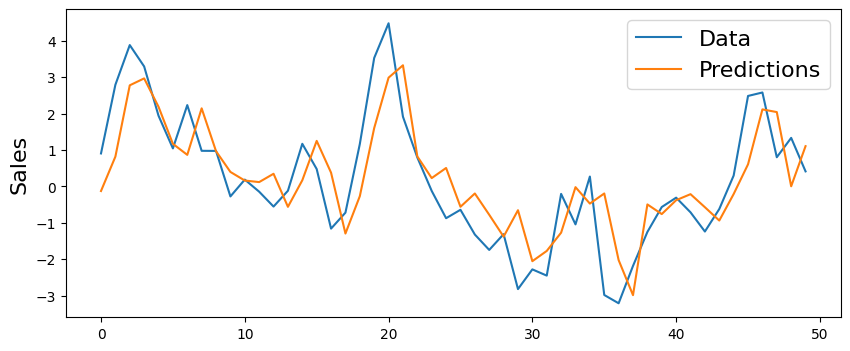

In [23]:
plt.figure(figsize=(10,4))

plt.plot(X[50:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.ylabel('Sales', fontsize=16)